In [242]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure._regionprops import RegionProperties
from skimage.morphology import binary_erosion, binary_closing

In [133]:
import pickle

with open('../5_L4_region', 'rb') as f:
    tst_region = pickle.load(f)

In [253]:
def defect_search(region: RegionProperties, radius=5, threshold_up=0.7, threshold_min=0.2):
    filled_image = region.filled_image
    defect_map = np.zeros_like(filled_image, dtype=np.float32)
    for i in range(filled_image.shape[0]):
        current_slice = filled_image[i]
        current_slice = np.pad(current_slice, (radius, radius))
        slice_defect_image = np.zeros_like(current_slice, dtype=float)
        # get edge
        edge = current_slice ^ binary_erosion(current_slice)
        #edge = binary_closing(edge)
        slice_coords = tuple(zip(*np.where(edge != 0)))
        for coord in slice_coords:
            x, y = coord
            roi = current_slice[x - radius:x + radius + 1, y - radius:y + radius + 1]
            filled_value = np.sum(roi) / ((2 * radius) ** 2)
            slice_defect_image[x, y] = filled_value
            #print(filled_value, slice_defect_image[x,y])
        defect_map[i] = slice_defect_image[radius:-radius, radius:-radius]
        #print(np.mean([defect_map[i] > 0]))
    return ((defect_map > threshold_up) * (defect_map < threshold_min)) * (defect_map > 0.01), defect_map
    #return defect_map

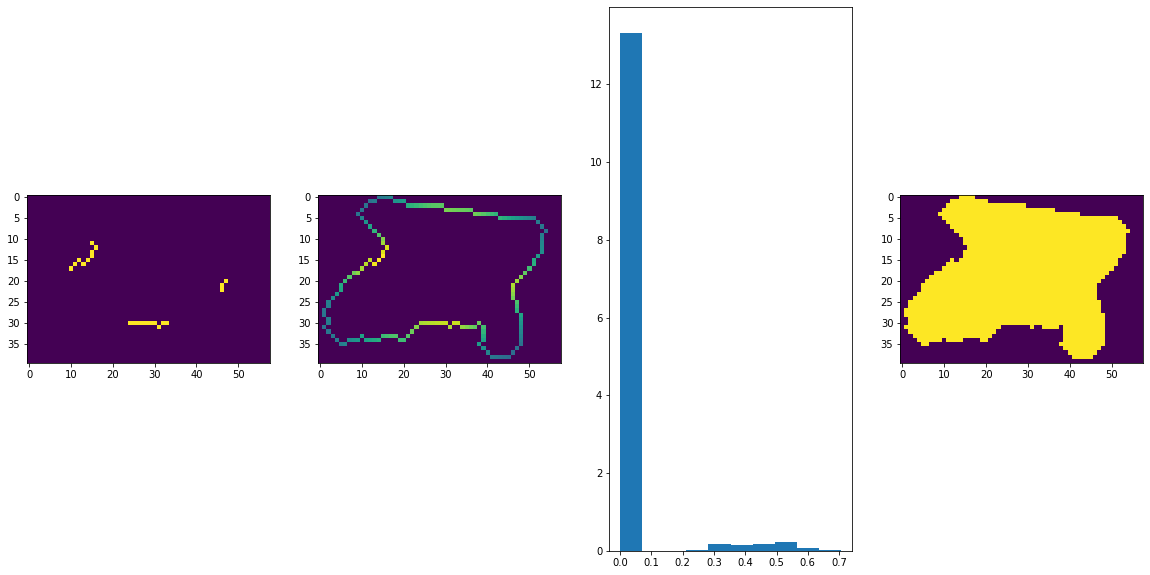

In [259]:
defect_data, defect_vals = defect_search(tst_region, threshold_up=0.6, threshold_min=0.8, radius=15)

num = 4
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
ax[0].imshow(defect_data[num])
ax[1].imshow(defect_vals[num])
ax[2].hist(defect_vals.flat, density=True)
ax[3].imshow(tst_region.filled_image[num])

(array([7.51647510e+00, 0.00000000e+00, 0.00000000e+00, 4.21455939e-03,
        4.40613027e-02, 1.49808429e-01, 2.29885057e-01, 4.29118774e-02,
        1.07279693e-02, 1.91570881e-03]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.125, 1.25 ], dtype=float32),
 <a list of 10 Patch objects>)

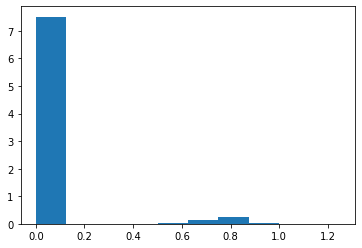